<a href="https://colab.research.google.com/github/Nikila-K/Assignments/blob/main/Nikila_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
#loading the necessary libraries

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
#loading the dataset

In [101]:
from google.colab import files
files.upload()

Saving iris.xls to iris (1).xls


{'iris.xls': b'\xd0\xcf\x11\xe0\xa1\xb1\x1a\xe1\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00>\x00\x03\x00\xfe\xff\t\x00\x06\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00D\x00\x00\x00\x00\x00\x00\x00\x00\x10\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00\xfe\xff\xff\xff\x00\x00\x00\x00C\x00\x00\x00\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff\xff

In [102]:
data=pd.read_excel('iris.xls')

In [103]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#checking the basic details of the dataset

In [104]:
data.shape

(150, 5)

In [105]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [107]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [108]:
data.Classification.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [ ]:
#filling the missing values

In [109]:
data['SL']=data['SL'].fillna(data['SL'].median())

In [110]:
data['SW']=data['SW'].fillna(data['SW'].median())

In [111]:
data['PL']=data['PL'].fillna(data['PL'].median())

In [112]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
#Handling Outliers

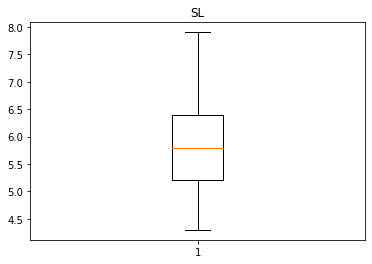

In [113]:
plt.boxplot(data['SL'])
plt.title('SL')
plt.show()

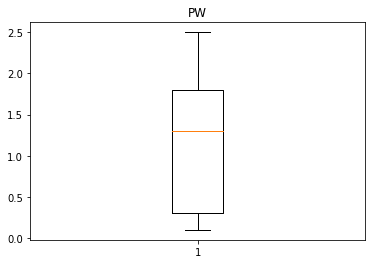

In [114]:
plt.boxplot(data['PW'])
plt.title('PW')
plt.show()

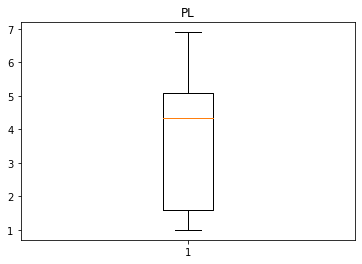

In [115]:
plt.boxplot(data['PL'])
plt.title('PL')
plt.show()

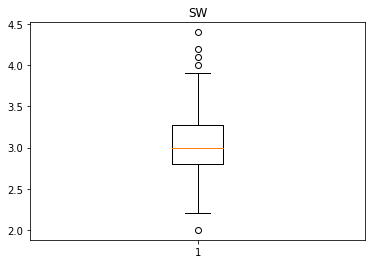

In [116]:
plt.boxplot(data['SW'])
plt.title('SW')
plt.show()

In [117]:
Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')

In [118]:
print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [119]:
IQR=Q3-Q1
print(Q3-Q1)

0.4500000000000002


In [120]:
upper_limit=Q3+1.5*IQR
lower_limit=Q1-1.5*IQR

In [121]:
print(lower_limit)
print(upper_limit)

2.1249999999999996
3.9250000000000003


In [122]:
outlier=[]
for x in data['SW']:
  if((x>upper_limit) or (x<lower_limit)):
    outlier.append(x)

In [123]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [124]:
index_out=data['SW']>upper_limit

In [125]:
data.loc[index_out].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [126]:
data.drop(data.loc[index_out].index,inplace=True)

In [127]:
data.head(20)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [128]:
data.corr()

,SL,SW,PL,PW
SL,1.000000,-0.080478,0.841457,0.807989
SW,-0.080478,1.000000,-0.349847,-0.281226
PL,0.841457,-0.349847,1.000000,0.933260
PW,0.807989,-0.281226,0.933260,1.000000


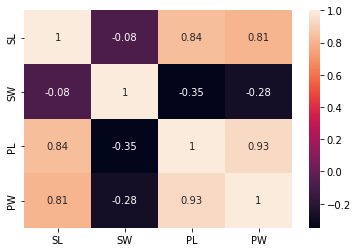

In [129]:
sns.heatmap(data.corr(),annot=True);


In [ ]:
#scatter plot

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


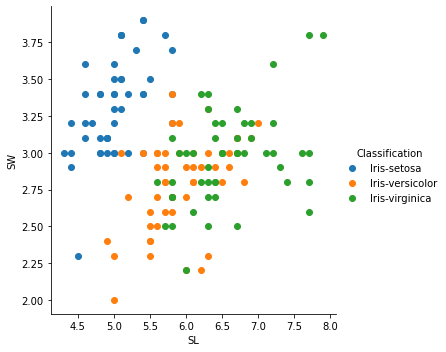

In [130]:
sns.FacetGrid(data,hue="Classification",size=5).map(plt.scatter,"SL","SW").add_legend()

In [131]:
#Minmax scaling

In [132]:
data1=data.drop(['Classification'],axis=1)

In [133]:
data1

,SL,SW,PL,PW
0,5.1,3.5,1.40,0.2
1,4.9,3.0,1.40,0.2
2,5.8,3.2,1.30,0.2
3,4.6,3.1,1.50,0.2
4,5.0,3.6,1.40,0.2
...,...,...,...,...
145,6.7,3.0,5.20,2.3
146,6.3,2.5,5.00,1.9
147,6.5,3.0,4.35,2.0
148,6.2,3.4,5.40,2.3


In [134]:
from sklearn.preprocessing import MinMaxScaler

In [135]:
minmax= MinMaxScaler(feature_range=(0,1))

In [136]:
X1=minmax.fit_transform(data1)

In [137]:
X1

array([[0.22222222, 0.78947368, 0.06779661, 0.04166667],
       [0.16666667, 0.52631579, 0.06779661, 0.04166667],
       [0.41666667, 0.63157895, 0.05084746, 0.04166667],
       [0.08333333, 0.57894737, 0.08474576, 0.04166667],
       [0.19444444, 0.84210526, 0.06779661, 0.04166667],
       [0.30555556, 1.        , 0.11864407, 0.125     ],
       [0.08333333, 0.73684211, 0.06779661, 0.08333333],
       [0.19444444, 0.73684211, 0.08474576, 0.04166667],
       [0.02777778, 0.47368421, 0.06779661, 0.04166667],
       [0.16666667, 0.57894737, 0.08474576, 0.        ],
       [0.30555556, 0.52631579, 0.08474576, 0.04166667],
       [0.13888889, 0.73684211, 0.10169492, 0.04166667],
       [0.13888889, 0.52631579, 0.06779661, 0.        ],
       [0.        , 0.52631579, 0.01694915, 0.        ],
       [0.30555556, 1.        , 0.05084746, 0.125     ],
       [0.22222222, 0.78947368, 0.06779661, 0.08333333],
       [0.38888889, 0.94736842, 0.11864407, 0.08333333],
       [0.22222222, 0.94736842,

In [138]:
type(X1) #X1 is an array now

numpy.ndarray

In [139]:
X1.shape

(146, 4)

In [140]:
data1.columns

Index(['SL', 'SW', 'PL', 'PW'], dtype='object')

In [141]:
#Converting X1 back into dataframe

In [142]:
X1=pd.DataFrame(X1,columns=['SL', 'SW', 'PL', 'PW'])

In [143]:
X1.shape

(146, 4)

In [144]:
X1

,SL,SW,PL,PW
0,0.222222,0.789474,0.067797,0.041667
1,0.166667,0.526316,0.067797,0.041667
2,0.416667,0.631579,0.050847,0.041667
3,0.083333,0.578947,0.084746,0.041667
4,0.194444,0.842105,0.067797,0.041667
...,...,...,...,...
141,0.666667,0.526316,0.711864,0.916667
142,0.555556,0.263158,0.677966,0.750000
143,0.611111,0.526316,0.567797,0.791667
144,0.527778,0.736842,0.745763,0.916667


In [145]:
X1.describe()

,SL,SW,PL,PW
count,146.000000,146.000000,146.000000,146.000000
mean,0.433790,0.534968,0.482238,0.468893
std,0.226991,0.201345,0.289253,0.314931
min,0.000000,0.000000,0.000000,0.000000
25%,0.229167,0.421053,0.101695,0.083333
50%,0.416667,0.526316,0.567797,0.500000
75%,0.583333,0.631579,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [146]:
X2=data['Classification']


In [147]:
X2.set_axis(np.arange(146),inplace=True)#set axis for classification column

In [148]:
X2

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
144    Iris-virginica
145    Iris-virginica
Name: Classification, Length: 146, dtype: object

In [149]:
X2.shape

(146,)

In [150]:
X3=pd.concat([X1,X2],axis=1)

Classification Models

Logistic Regression Model

In [151]:
y=X3['Classification']#target
x=X3.drop('Classification',axis=1)

In [152]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
141    Iris-virginica
142    Iris-virginica
143    Iris-virginica
144    Iris-virginica
145    Iris-virginica
Name: Classification, Length: 146, dtype: object

In [155]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)#train data ,test data splitting


In [156]:
from sklearn.linear_model import LogisticRegression#Logistic Regression is present in linear_model
lr=LogisticRegression()#creating an instance
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [157]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [160]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]])

In [158]:
acc_score = accuracy_score(y_test,y_pred)

In [159]:
acc_score

0.9459459459459459

KNN

In [161]:
#knn
from sklearn.neighbors import KNeighborsClassifier
metric_k= []#empty list
neighbors = np.arange(3, 15)#k value from 3 to 14

for k in neighbors:
  knn=KNeighborsClassifier(n_neighbors=k)
  model2=knn.fit(x_train,y_train)
  y_pred_knn=model2.predict(x_test)
  acc=accuracy_score(y_test,y_pred_knn)
  metric_k.append(acc)#appending accuracy of model for each k values

In [162]:
metric_k

[0.972972972972973,
 0.972972972972973,
 1.0,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973,
 0.972972972972973]

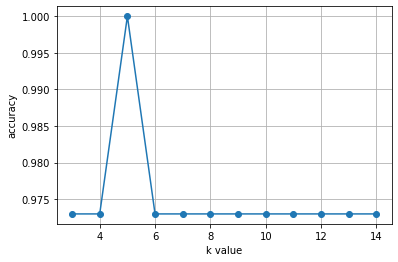

In [163]:
#Ploting line graph of accuracy of model for each value of k 
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [183]:
#accuracy is more for k=5,so creating model using k=5
knn=KNeighborsClassifier(n_neighbors=5)
model2=knn.fit(x_train,y_train)
y_pred_knn=model2.predict(x_test)

In [184]:
print(confusion_matrix(y_test,y_pred_knn))

[[16  0  0]
 [ 0  8  0]
 [ 0  0 13]]


In [185]:
print(accuracy_score(y_test,y_pred_knn))

1.0


SVM Model

In [167]:
from sklearn.svm import SVC#support vector classifier

SVM kernel=rbf

In [168]:
svm_clf=SVC(kernel='rbf')
svm_model=svm_clf.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)

In [169]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]])

In [170]:
accuracy_score(y_test,y_pred)

0.9459459459459459

SVM kernel=linear

In [171]:
svm_clf_linear=SVC(kernel='linear')
svm_model_linear=svm_clf.fit(x_train,y_train)
y_pred=svm_model_linear.predict(x_test)

In [172]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]])

In [173]:
accuracy_score(y_test,y_pred)

0.9459459459459459

SVM Kernel=Polynomial

In [174]:
svm_clf_linear=SVC(kernel='poly')
svm_model_poly=svm_clf.fit(x_train,y_train)
y_pred=svm_model_poly.predict(x_test)

In [175]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]])

In [176]:
accuracy_score(y_test,y_pred)

0.9459459459459459

Decision trees

In [177]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(random_state=42)
dt_model=dt_clf.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [178]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]])

In [179]:
accuracy_score(y_test,y_pred)

0.9459459459459459

Random Forest

In [180]:
from sklearn.ensemble import RandomForestClassifier
rf_clf= RandomForestClassifier(random_state=42)
rf_model=rf_clf.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [181]:
confusion_matrix(y_test,y_pred)

array([[16,  0,  0],
       [ 0,  7,  1],
       [ 0,  1, 12]])

In [182]:
accuracy_score(y_test,y_pred)

0.9459459459459459

In [188]:
from sklearn.metrics import accuracy_score, log_loss
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
                  ]

In [189]:
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)
 
for clf in classifiers:
    clf.fit(x_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(x_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    log_entry = pd.DataFrame([[name, acc*100, 11]], columns=log_cols)
    log = log.append(log_entry)
    
    print("="*30)

LogisticRegression
****Results****
Accuracy: 94.5946%
KNeighborsClassifier
****Results****
Accuracy: 100.0000%
SVC
****Results****
Accuracy: 94.5946%
DecisionTreeClassifier
****Results****
Accuracy: 94.5946%
RandomForestClassifier
****Results****
Accuracy: 94.5946%


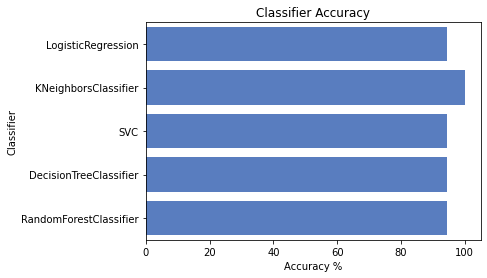

In [190]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

KNN classification is having 100%accuracy.All other classifications are having the same value less than Knn.